In [134]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
from matplotlib import colors

In [135]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1) 

In [136]:
def plot_data(X, y, ax, pos_label="y=1", neg_label="y=0", s=80, loc='best' ):
    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0
    pos = pos.reshape(-1,) 
    neg = neg.reshape(-1,)

    # Plot examples
    ax.scatter(X[pos, 0], X[pos, 1], marker='x', s=s, c = 'red', label=pos_label)
    ax.scatter(X[neg, 0], X[neg, 1], marker='o', s=s, label=neg_label, facecolors='none', edgecolors='blue', lw=3)
    ax.legend(loc=loc)

In [147]:
def plt_prob(ax, w_out, b_out):
    """Plots a decision boundary with shading to indicate the probability."""
    # Setup useful ranges and common linspaces
    x0_space = np.linspace(0, 4, 100)
    x1_space = np.linspace(0, 4, 100)

    # Generate a grid for x0 and x1
    tmp_x0, tmp_x1 = np.meshgrid(x0_space, x1_space)
    z = np.zeros_like(tmp_x0)

    # Compute probabilities for each point in the grid
    for i in range(tmp_x0.shape[0]):
        for j in range(tmp_x1.shape[1]):
            z[i, j] = sigmoid(np.dot(w_out, np.array([tmp_x0[i, j], tmp_x1[i, j]])) + b_out)

    # Use a predefined colormap without truncation
    cmap = plt.get_cmap('Blues')

    # Normalize the colormap between 0 and 1
    norm = colors.Normalize(vmin=0, vmax=1)

    # Plot the probabilities using pcolormesh
    pcm = ax.pcolormesh(tmp_x0, tmp_x1, z, norm=norm, cmap=cmap, shading='nearest', alpha=0.9)

    # Add a colorbar to the plot
    ax.figure.colorbar(pcm, ax=ax)


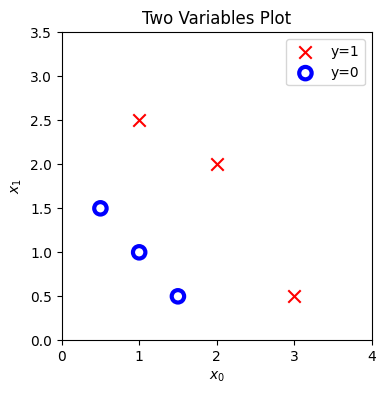

In [148]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))

plot_data(X_train, y_train, ax)

ax.set_title("Two Variables Plot")
ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$')
ax.legend()
plt.show()

In [150]:
def sigmoid(z):
    z = np.clip(z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))
    return g

In [159]:
def compute_cost_logistic(X, y, w, b):
    m = X.shape[0]
    
    z = np.dot(X, w) + b
    f_wb = sigmoid(z)
    cost = (1 / m) * np.sum(-y * np.log(f_wb) - (1-y) * np.log(1-f_wb))
             
    return cost

In [160]:
weights_tmp = np.array([1,1])
bias_tmp = -3
print(compute_cost_logistic(X_train, y_train, weights_tmp, bias_tmp))

4.701200718433105


In [164]:
def compute_gradient_logistic(X, y, w, b): 
    m,n = X.shape

    f_wb = sigmoid(np.dot(X, w) + b)
    y = y.ravel()
    
    dj_dw = (1 / m) * np.dot((f_wb  - y), X) 
    dj_db = (1 / m) * np.sum(f_wb  - y)                              
        
    return dj_db, dj_dw  

In [163]:
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_train, y_train, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.4988394298399669]


In [122]:
def gradient_descent(X, y, w_in, b_in, alpha, epochs): 
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(epochs):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(epochs / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history       


In [123]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alpha = 0.1
epochs = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alpha, epochs) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost [0.68461047]   
Iteration 1000: Cost [0.15909777]   
Iteration 2000: Cost [0.08460064]   
Iteration 3000: Cost [0.05705327]   
Iteration 4000: Cost [0.04290759]   
Iteration 5000: Cost [0.03433848]   
Iteration 6000: Cost [0.0286038]   
Iteration 7000: Cost [0.02450157]   
Iteration 8000: Cost [0.0214237]   
Iteration 9000: Cost [0.01903014]   

updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837


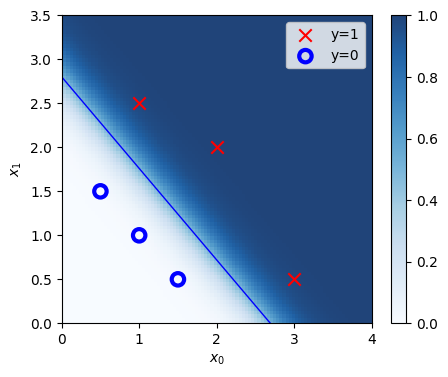

In [149]:
fig,ax = plt.subplots(1,1,figsize=(5,4))
# plot the probability 
plt_prob(ax, w_out, b_out)

# Plot the original data
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')   
ax.axis([0, 4, 0, 3.5])

plot_data(X_train, y_train, ax)

# Plot the decision boundary
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0],[x1,0], c='blue', lw=1)
plt.show()